In [46]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

In [20]:
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
df = pd.read_csv("/Users/abasar/Downloads/tcs.csv")

In [3]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,07-May-2018,3480.75,3490.00,3490.00,3410.9,3428.0,3420.95,3438.41,1742213,5.990435e+09,95521,1155927,66.35
1,TCS,EQ,08-May-2018,3420.95,3434.70,3486.50,3396.7,3440.2,3441.20,3447.80,1496410,5.159322e+09,75803,710340,47.47
2,TCS,EQ,09-May-2018,3441.20,3440.20,3494.75,3440.2,3488.5,3489.30,3480.95,1307525,4.551423e+09,74986,754487,57.70
3,TCS,EQ,10-May-2018,3489.30,3502.95,3511.15,3440.2,3446.3,3451.25,3478.59,1929339,6.711381e+09,78782,1044165,54.12
4,TCS,EQ,11-May-2018,3451.25,3454.20,3485.00,3442.5,3461.0,3456.95,3461.07,1313938,4.547637e+09,44332,734225,55.88


In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
Symbol                    250 non-null object
Series                    250 non-null object
Date                      250 non-null datetime64[ns]
Prev Close                250 non-null float64
Open Price                250 non-null float64
High Price                250 non-null float64
Low Price                 250 non-null float64
Last Price                250 non-null float64
Close Price               250 non-null float64
Average Price             250 non-null float64
Total Traded Quantity     250 non-null int64
Turnover                  250 non-null float64
No. of Trades             250 non-null int64
Deliverable Qty           250 non-null int64
% Dly Qt to Traded Qty    250 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 29.4+ KB


In [10]:
df[df.Date.duplicated(keep = False)]

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
191,TCS,BL,2019-02-11,2604.20,2061.40,2061.40,2061.40,2061.40,2061.40,2061.40,376308,7.757213e+08,1,0,0.00
192,TCS,EQ,2019-02-11,2061.40,2060.00,2096.00,2048.90,2065.60,2065.90,2077.11,1778730,3.694622e+09,83603,901516,50.68
197,TCS,BL,2019-02-18,2061.40,2029.70,2029.70,2029.70,2029.70,2029.70,2029.70,2474600,5.022696e+09,1,0,0.00
198,TCS,EQ,2019-02-18,2029.70,2037.60,2041.95,1962.65,1969.60,1970.30,1988.87,2942184,5.851634e+09,100585,1668905,56.72
203,TCS,BL,2019-02-25,2029.70,1925.65,1925.65,1925.65,1925.65,1925.65,1925.65,1057509,2.036392e+09,2,0,0.00
204,TCS,EQ,2019-02-25,1925.65,1932.50,1990.00,1930.50,1987.00,1985.15,1961.61,2934880,5.757095e+09,140541,1341508,45.71
221,TCS,BL,2019-03-22,1925.65,2015.05,2015.05,2015.05,2015.05,2015.05,2015.05,264913,5.338129e+08,1,264913,100.00
222,TCS,EQ,2019-03-22,2015.05,2015.00,2016.00,1983.30,2010.00,2005.65,1998.96,3148149,6.293032e+09,155770,1787595,56.78


In [12]:
df = df[~df.Date.duplicated()]

In [13]:
df.sample(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
6,TCS,EQ,2018-05-15,3433.55,3450.00,3495.80,3433.70,3487.00,3482.40,3477.97,976445,3.396047e+09,72769,426098,43.64
9,TCS,EQ,2018-05-18,3491.80,3480.80,3517.70,3458.00,3495.00,3502.05,3487.86,937498,3.269861e+09,71488,518150,55.27
232,TCS,EQ,2019-04-05,2014.50,2028.65,2054.40,2018.80,2051.00,2048.30,2037.19,3152103,6.421435e+09,96704,1536645,48.75
66,TCS,EQ,2018-08-07,1975.55,1978.20,1979.15,1960.50,1969.00,1967.35,1967.34,1353560,2.662908e+09,95485,914572,67.57
173,TCS,EQ,2019-01-16,1867.80,1870.00,1875.00,1847.00,1873.95,1870.15,1861.89,2359280,4.392724e+09,131093,1033927,43.82
245,TCS,EQ,2019-04-26,2195.00,2203.00,2243.95,2193.15,2231.10,2238.55,2225.36,2716958,6.046198e+09,110079,1175323,43.26
31,TCS,EQ,2018-06-19,1829.00,1822.15,1839.00,1821.00,1822.90,1824.50,1829.83,3245034,5.937862e+09,139033,1712806,52.78
184,TCS,EQ,2019-01-31,1981.40,1987.00,2019.75,1985.00,2009.50,2014.10,2008.37,4094319,8.222922e+09,146142,2810409,68.64
183,TCS,EQ,2019-01-30,1982.75,1979.60,1989.50,1954.65,1984.15,1981.40,1975.06,2429575,4.798567e+09,112445,1325919,54.57
30,TCS,EQ,2018-06-18,1840.05,1867.95,1867.95,1822.15,1824.00,1829.00,1840.85,4674987,8.605956e+09,212032,2287621,48.93


In [14]:
df.index = df.Date

In [15]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2018-05-07,TCS,EQ,2018-05-07,3480.75,3490.00,3490.00,3410.9,3428.0,3420.95,3438.41,1742213,5.990435e+09,95521,1155927,66.35
2018-05-08,TCS,EQ,2018-05-08,3420.95,3434.70,3486.50,3396.7,3440.2,3441.20,3447.80,1496410,5.159322e+09,75803,710340,47.47
2018-05-09,TCS,EQ,2018-05-09,3441.20,3440.20,3494.75,3440.2,3488.5,3489.30,3480.95,1307525,4.551423e+09,74986,754487,57.70
2018-05-10,TCS,EQ,2018-05-10,3489.30,3502.95,3511.15,3440.2,3446.3,3451.25,3478.59,1929339,6.711381e+09,78782,1044165,54.12
2018-05-11,TCS,EQ,2018-05-11,3451.25,3454.20,3485.00,3442.5,3461.0,3456.95,3461.07,1313938,4.547637e+09,44332,734225,55.88


In [29]:
y = df["Close Price"]
y

Date
2018-05-07    3420.95
2018-05-08    3441.20
2018-05-09    3489.30
2018-05-10    3451.25
2018-05-11    3456.95
2018-05-14    3433.55
2018-05-15    3482.40
2018-05-16    3493.90
2018-05-17    3491.80
2018-05-18    3502.05
2018-05-21    3556.75
2018-05-22    3508.90
2018-05-23    3495.10
2018-05-24    3603.70
2018-05-25    3585.80
2018-05-28    3502.05
2018-05-29    3523.50
2018-05-30    3514.10
2018-05-31    1741.05
2018-06-01    1732.45
2018-06-04    1744.25
2018-06-05    1721.60
2018-06-06    1725.75
2018-06-07    1735.55
2018-06-08    1747.10
2018-06-11    1749.70
2018-06-12    1781.00
2018-06-13    1824.10
2018-06-14    1787.55
2018-06-15    1840.05
               ...   
2019-03-19    2022.80
2019-03-20    2015.05
2019-03-22    2015.05
2019-03-25    1984.25
2019-03-26    1982.65
2019-03-27    1967.90
2019-03-28    2000.30
2019-03-29    2001.65
2019-04-01    2031.65
2019-04-02    2079.30
2019-04-03    2079.30
2019-04-04    2014.50
2019-04-05    2048.30
2019-04-08    2070.75
2019-

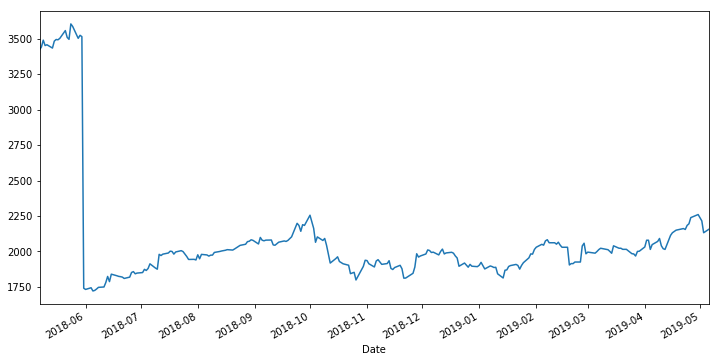

In [21]:
y.plot()

In [32]:
y = y[y.index>="2018-06"]

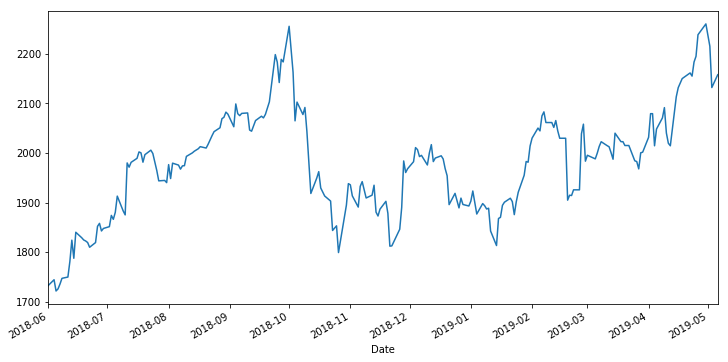

In [33]:
y.plot()

In [38]:
y = y.asfreq("D", method="ffill")

In [49]:
X = pd.DataFrame({
    "actual": y, 
    "rolling_mean": y.rolling(3).mean(),
    "ma_estimate": y.rolling(3).mean().shift(1)
})
X.head(10)

,actual,rolling_mean,ma_estimate
Date,,,
2018-06-01,1732.45,NaN,NaN
2018-06-02,1732.45,NaN,NaN
2018-06-03,1732.45,1732.450000,NaN
2018-06-04,1744.25,1736.383333,1732.450000
2018-06-05,1721.60,1732.766667,1736.383333
2018-06-06,1725.75,1730.533333,1732.766667
2018-06-07,1735.55,1727.633333,1730.533333
2018-06-08,1747.10,1736.133333,1727.633333
2018-06-09,1747.10,1743.250000,1736.133333


In [50]:
X1 = X.dropna()
X1

,actual,rolling_mean,ma_estimate
Date,,,
2018-06-04,1744.25,1736.383333,1732.450000
2018-06-05,1721.60,1732.766667,1736.383333
2018-06-06,1725.75,1730.533333,1732.766667
2018-06-07,1735.55,1727.633333,1730.533333
2018-06-08,1747.10,1736.133333,1727.633333
2018-06-09,1747.10,1743.250000,1736.133333
2018-06-10,1747.10,1747.100000,1743.250000
2018-06-11,1749.70,1747.966667,1747.100000
2018-06-12,1781.00,1759.266667,1747.966667


In [51]:
metrics.mean_squared_error(X1.actual, X1.ma_estimate) ** 0.5

32.85370372073933